In [59]:
#Loading the saved_model(change the path according to your directory names)
import tensorflow as tf
import time, os
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

%matplotlib inline
import numpy as np
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [60]:
PATH_TO_SAVED_MODEL="/Users/victor/Documents/saved_models/my_centernet/saved_model/"
# Load saved model and build the detection function
detect_fn=tf.saved_model.load(PATH_TO_SAVED_MODEL)

#Load the label_map
category_index=label_map_util.create_category_index_from_labelmap("data/label_map.pbtxt",use_display_name=True)

#Load some test images
img_dir=os.listdir('test_images')

In [61]:
def load_image_into_numpy_array(path):
    return np.array(Image.open(path))

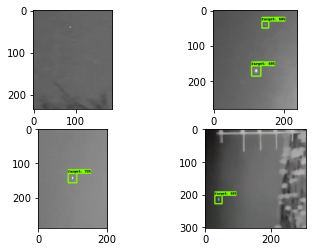

In [62]:
images = []
for image_path in img_dir:
    #print('Running inference for {}... '.format(image_path), end='')
    for i, file in enumerate(img_dir[0:5]):
        fullpath = "test_images/" + file
        image_np=load_image_into_numpy_array(fullpath)
        input_tensor=tf.convert_to_tensor(image_np)
        input_tensor=input_tensor[tf.newaxis, ...]
        detections=detect_fn(input_tensor)

        num_detections=int(detections.pop('num_detections'))
        detections={key:value[0,:num_detections].numpy()
        for key,value in detections.items()}
        detections['num_detections']=num_detections
        detections['detection_classes'] = detections['detection_classes'].astype(np.int64)
        image_np_with_detections=image_np.copy()
        images.append(image_np_with_detections)
        viz_utils.visualize_boxes_and_labels_on_image_array(
              image_np_with_detections,
              detections['detection_boxes'],
              detections['detection_classes'],
              detections['detection_scores'],
              category_index,
              use_normalized_coordinates=True,
              max_boxes_to_draw=5,     
              min_score_thresh=0.5)
     
f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(images[0])
axarr[0,1].imshow(images[1])
axarr[1,0].imshow(images[2])
axarr[1,1].imshow(images[3])

#cv2.imwrite("frame.jpg", image_np_with_detections)